Task 3

Task: Geospatial Analysis

1] Visualize the locations of restaurants on amap using latitude and longitude information.

2] Analyze the distribution of restaurants across different cities or countries.

3] Determine if there is any correlation between the restaurant's location and its rating.


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas


In [19]:
!pip install geopandas


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
df= pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Prithviraj\internship\Internship\Restaurant.csv")

In [22]:
df.loc[df['Longitude'] == 'Caddebostan, Istanbul', 'Longitude'] = correct_longitude
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326"
)

C:\Users\HP\AppData\Local\Temp\ipykernel_20428\2107457677.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))


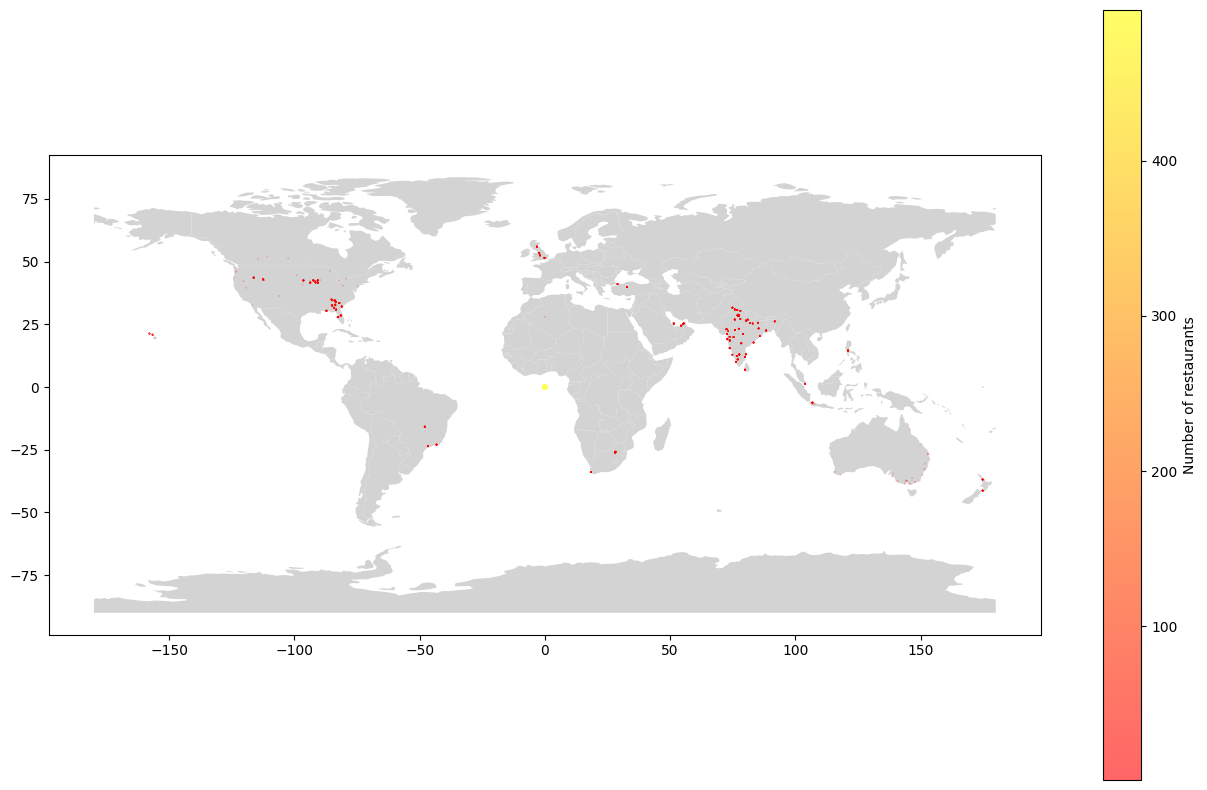

In [25]:
df1=df.groupby(['Longitude','Latitude'])['City'].count().reset_index()

worldmap = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))

fig, ax = plt.subplots(figsize=(16, 10))
worldmap.plot(color="lightgrey", ax=ax)

x = df1['Longitude']
y = df1['Latitude']
z = df1['City']
plt.scatter(x, y, 
              s=0.025*z,
              c=z,
              alpha=0.6,             
              cmap='autumn'
            )
plt.colorbar(label='Number of restaurants')


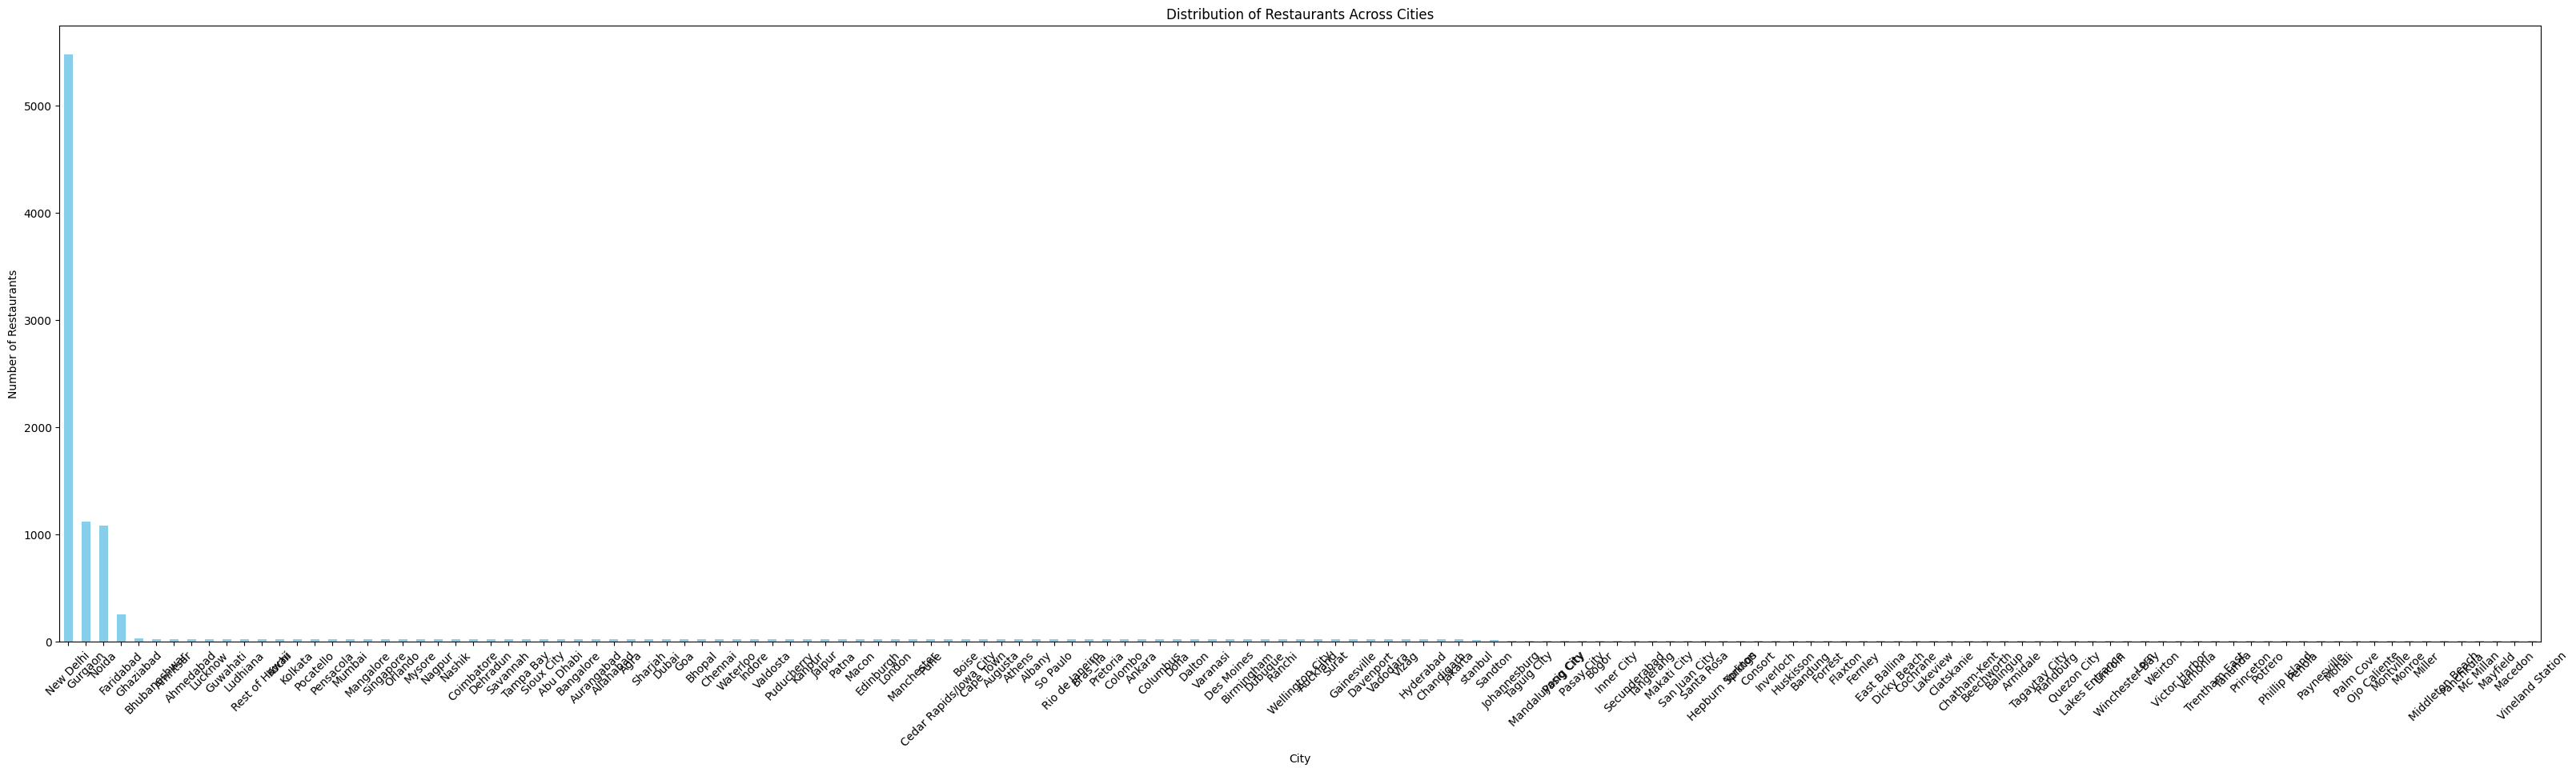

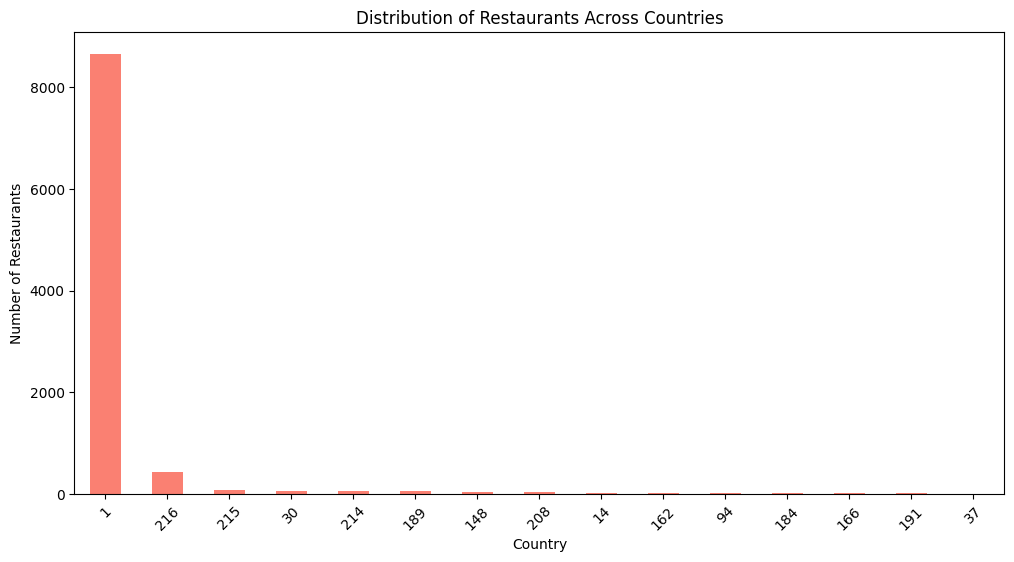

In [29]:
plt.figure(figsize=(40, 10))
df['City'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Restaurants Across Cities')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
df['Country Code'].value_counts().plot(kind='bar', color='salmon')
plt.title('Distribution of Restaurants Across Countries')
plt.xlabel('Country')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()


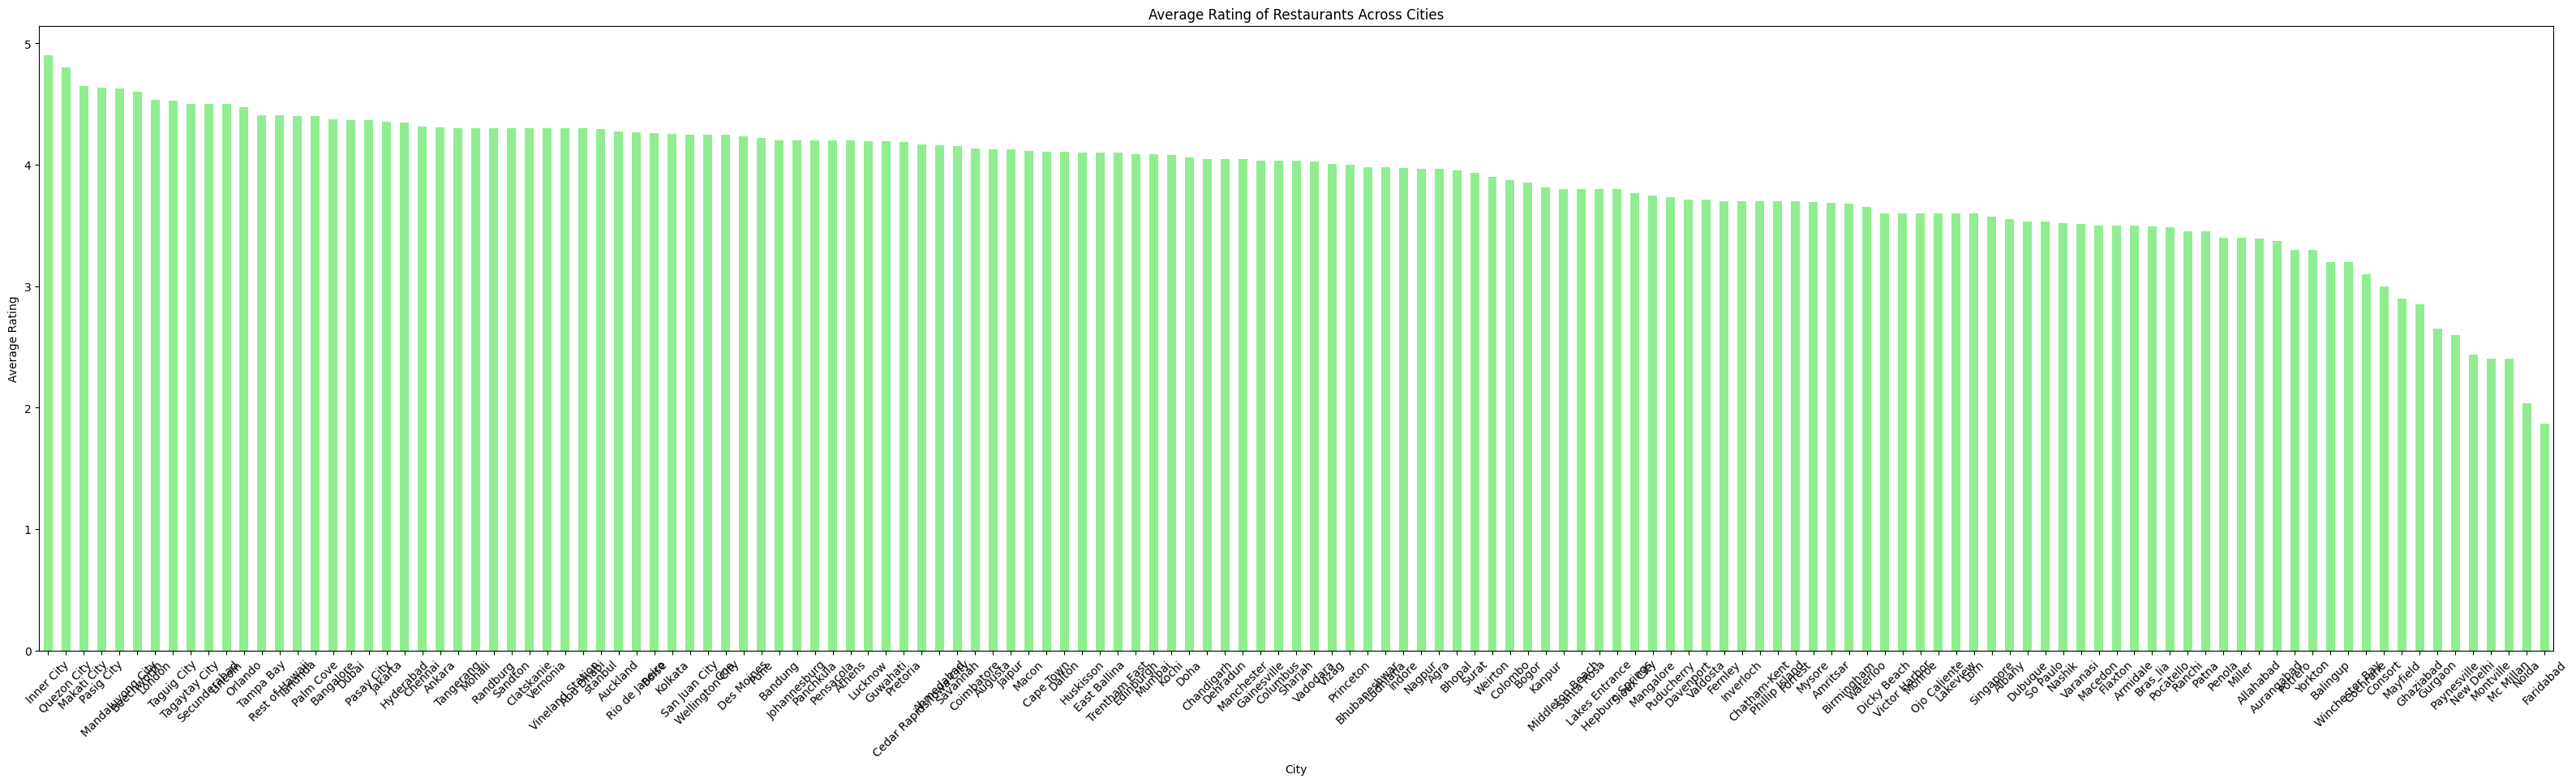

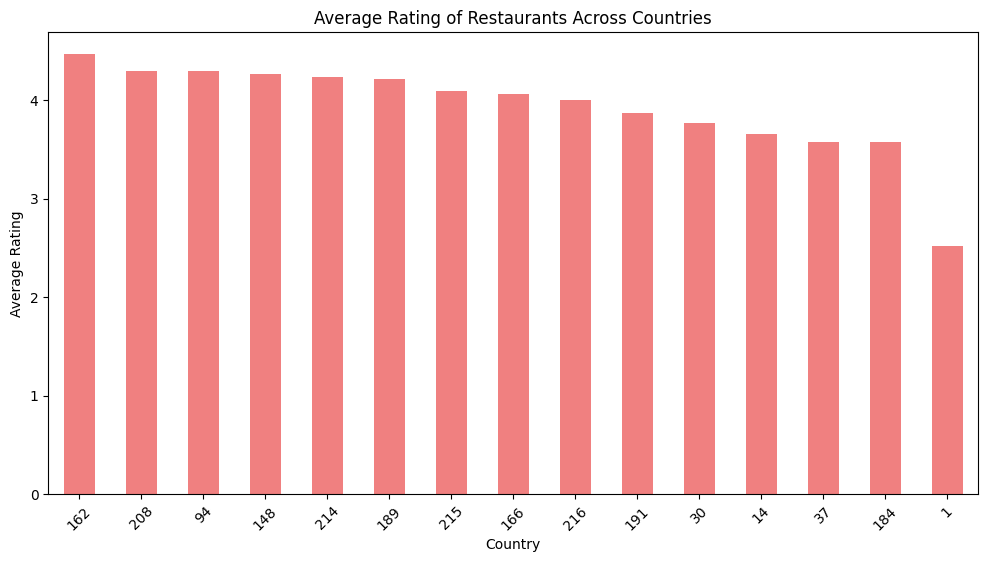

In [30]:

# Below code removes the correlation between location and rating
plt.figure(figsize=(40, 10))
city_rating = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
city_rating.plot(kind='bar', color='lightgreen')
plt.title('Average Rating of Restaurants Across Cities')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
country_rating = df.groupby('Country Code')['Aggregate rating'].mean().sort_values(ascending=False)
country_rating.plot(kind='bar', color='lightcoral')
plt.title('Average Rating of Restaurants Across Countries')
plt.xlabel('Country')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()